In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('planet_osm_point_202312122304.json') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data['planet_osm_point'])
df.shape[0]

34361

In [4]:
nombre_nul_par_colonne = df.isnull().sum()

In [5]:
colonnes_toutes_nulles = nombre_nul_par_colonne[nombre_nul_par_colonne == len(df)].index
df_without_col_nan = df.drop(columns=colonnes_toutes_nulles)

In [6]:
count_way = df['way'].value_counts()
count_way

way
POINT (3.0536749 47.9437161)    3
POINT (3.0317711 47.8850073)    3
POINT (3.2379889 47.9328165)    3
POINT (3.0472097 47.8902345)    2
POINT (2.8629732 47.8664081)    2
                               ..
POINT (2.9131545 47.9433113)    1
POINT (2.9108482 47.9422417)    1
POINT (2.9103786 47.9419184)    1
POINT (2.91083 47.941513)       1
POINT (2.5345059 47.8453859)    1
Name: count, Length: 34325, dtype: int64

In [7]:
way = df_without_col_nan['way']
indexWay = []
for e in way:
    result  = e.split(' ')
    indexWay.append(
        (float(result[2].replace(')', '')), float(result[1].replace('(', '')) )
    )
dfIdxWay =  pd.DataFrame(indexWay, columns = ['x', 'y'])

In [8]:
df_without_col_nan = df_without_col_nan.drop(columns=['way', 'osm_id'])

In [9]:
df = pd.concat([dfIdxWay,df_without_col_nan], axis=1)

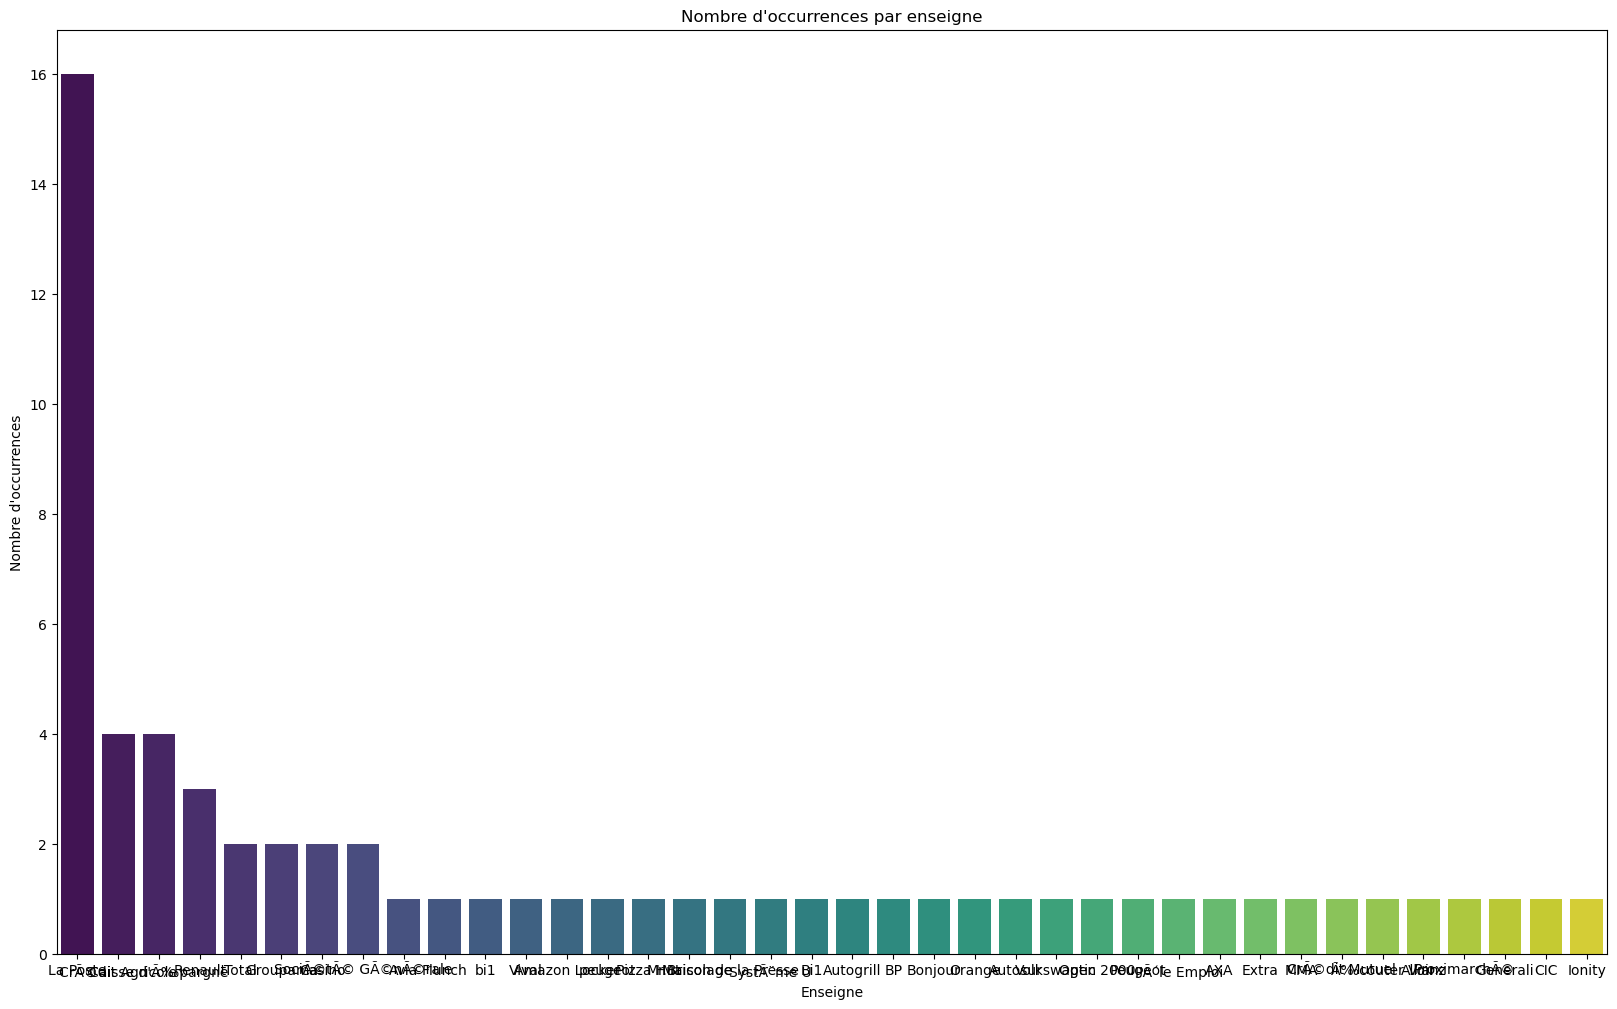

In [11]:
dfBrand = df['brand'].value_counts()
df_occurrences = pd.DataFrame({'brand': dfBrand.index, 'occurrences': dfBrand.values})

plt.figure(figsize=(20, 12))
sns.barplot(x='brand', y='occurrences', data=df_occurrences, palette='viridis')
plt.title('Nombre d\'occurrences par enseigne')
plt.xlabel('Enseigne')
plt.ylabel('Nombre d\'occurrences')
plt.show()